In [14]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd

# Bezier曲線

## Bezier曲線の定義

制御点を$\vec{B}_i (0\leq i \leq N-1)$とすると、Bezier曲線は

$$
\vec{P(t)} = \sum_i^{N-1} \vec{B}_i J_{(N-1),i}(t)
$$

と表される。ここで、
$$
J_{n,i}(t) = {}_n C_i t^i (1-t)^{n-i}
$$
である。

In [15]:
from scipy.misc import comb
def J(n, i, t):
    return comb(n, i) * t**i * (1-t)**(n-i)

In [16]:
def Bezier(t, B):
    N = len(B)
    
    Jmtx = np.array([J(N-1, i, t) for i in range(N)])
    return np.dot(Jmtx, B)

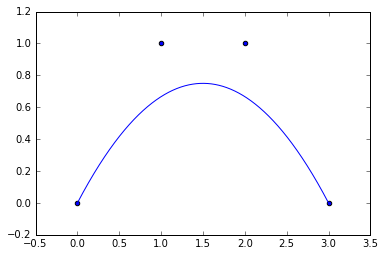

In [17]:
B = np.array([
        [0, 0], [1, 1], [2, 1], [3, 0]
    ])
ts = np.linspace(0, 1, 1000)
p = np.array([Bezier(t, B) for t in ts])
plt.plot(p[:,0], p[:,1])
plt.scatter(B[:,0], B[:,1])

## フィッティング

最小二乗法により制御点の座標を求める。

In [18]:
def func_res(params, x, y):
    params = np.array(params)
    B = params.reshape(len(params)//2, 2)
    N = len(B)
    curve = np.array([Bezier(t, B) for t in x])
    d = curve - np.array([x, y]).T
    return d.reshape(1, d.shape[0]*d.shape[1])[0,:]

def FitBezier(N, xdata, ydata):
    from scipy import optimize
    p0 = np.array(list(range(N*2)))
    param, _ = optimize.leastsq(func_res, p0, args=(xdata, ydata))
    B = param.reshape(len(param)//2, 2)
    return B

## ①

$$
y = \sqrt x
$$

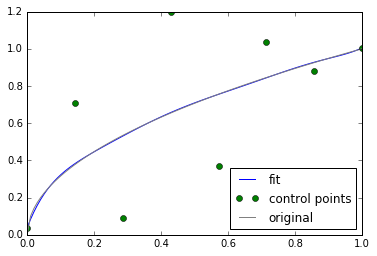

In [19]:
xdata = np.linspace(0, 1, 100)
ydata = np.sqrt(xdata)
B = FitBezier(8, xdata, ydata)
ts = np.linspace(0, 1, 100)
curve = np.array([Bezier(t, B) for t in ts])
plt.plot(curve[:,0], curve[:,1], label="fit")
plt.plot(B[:,0], B[:,1], "o", label="control points")
plt.plot(xdata, ydata, label="original", color="gray")
plt.legend(loc="lower right")

## ② 三角関数

$$
y = \sin(\pi x)
$$

In [20]:
import math
xdata = np.linspace(0, 1, 100)
ydata = np.sin(xdata * math.pi)

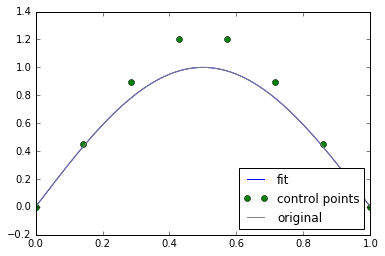

In [21]:
ts = np.linspace(0, 1, 100)
B = FitBezier(8, xdata, ydata)
ts = np.linspace(0, 1, 100)
curve = np.array([Bezier(t, B) for t in ts])
curve = np.array([Bezier(t, B) for t in ts])
plt.plot(curve[:,0], curve[:,1], label="fit")
plt.plot(B[:,0], B[:,1], "o", label="control points")
plt.plot(xdata, ydata, label="original", color="gray")
plt.legend(loc="lower right")

## ③ NACA6412

In [53]:
data = pd.read_csv("naca6412.dat", names=("x", "y"))
xdata = data.x
ydata = data.y

xu = xdata[:32]
yu = ydata[:32]
xl = xdata[32:]
yl = ydata[32:]

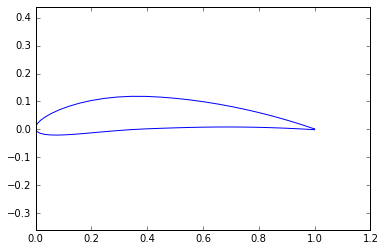

In [54]:
plt.axes().set_aspect('equal', 'datalim')
plt.plot(xdata, ydata)

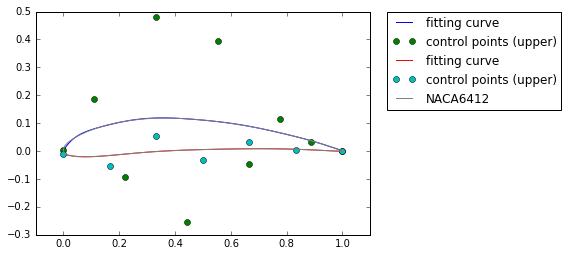

In [61]:
ts = np.linspace(0, 1, 100)

Bu = FitBezier(10, xu, yu)
upper = np.array([Bezier(t, Bu) for t in ts])
plt.plot(upper[:,0], upper[:,1], label="fitting curve")
plt.plot(Bu[:,0], Bu[:,1], "o", label="control points (upper)")

Bl = FitBezier(7, xl, yl)
lower = np.array([Bezier(t, Bl) for t in ts])
plt.plot(lower[:,0], lower[:,1], label="fitting curve")
plt.plot(Bl[:,0], Bl[:,1], "o", label="control points (upper)")

plt.plot(xdata, ydata, "gray", label="NACA6412")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axes().set_aspect('equal', 'datalim')